In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

sns.set()

In [8]:
df = pd.read_csv('Marketing Spend.csv')

df

,Month,Marketing Spend (#),Enrollments,Sales
0,"May, 2023",2056270,28,5200000
1,June 2023,28835077,103,23310000
2,July 2023,27869120,139,30620000
3,August 2023,30538618,225,59190000
4,September 2023,29830521,68,17270000
5,October 2023,30355831,119,24491246
6,November 2023,41780437,229,47265000
7,December 2023,34565599,414,81210540
8,January 2024,23112521,493,108115883
9,February 2024,17475006,89,27265000


## Correlation Analysis

In [15]:
# Calculate the correlation between Marketing Spend and Enrollments
corr_spend_enroll, _ = pearsonr(df['Marketing Spend (#)'], df['Enrollments'])
print(f"Correlation between Marketing Spend and Enrollments: {corr_spend_enroll:.2f}")

# Calculate the correlation between Marketing Spend and Sales
corr_spend_sales, _ = pearsonr(df['Marketing Spend (#)'], df['Sales'])
print(f"Correlation between Marketing Spend and Sales: {corr_spend_sales:.2f}")

Correlation between Marketing Spend and Enrollments: 0.45
Correlation between Marketing Spend and Sales: 0.35


## Visualization

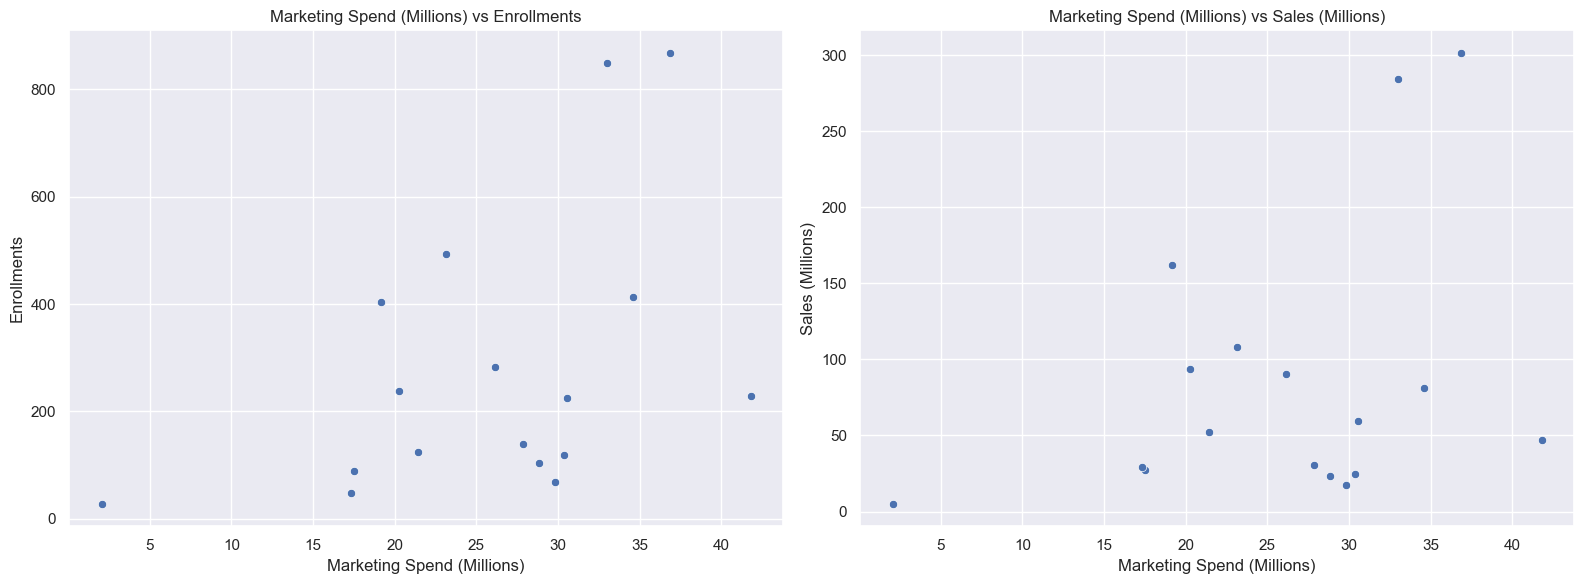

In [30]:
# Create new columns for Marketing Spend and Sales in Millions
df['Marketing Spend (Millions)'] = df['Marketing Spend (#)'] / 1_000_000
df['Sales (Millions)'] = df['Sales'] / 1_000_000

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot for Marketing Spend (in Millions) vs Enrollments 
sns.scatterplot(x='Marketing Spend (Millions)', y='Enrollments', data=df, ax=axes[0])
axes[0].set_title('Marketing Spend (Millions) vs Enrollments')
axes[0].set_xlabel('Marketing Spend (Millions)')
axes[0].set_ylabel('Enrollments')


# Scatter plot for Marketing Spend vs Sales (in Millions)
sns.scatterplot(x='Marketing Spend (Millions)', y='Sales (Millions)', data=df, ax=axes[1])
axes[1].set_title('Marketing Spend (Millions) vs Sales (Millions)')
axes[1].set_xlabel('Marketing Spend (Millions)')
axes[1].set_ylabel('Sales (Millions)')


# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


 ## Hypothesis Testing (Statistical Significance)

#### Pearson Correlation Test:
- It computes the Pearson correlation coefficient (r) and the corresponding p-value.
- The null hypothesis (H₀) is that there is no linear relationship (correlation) between the variables (i.e., r = 0).
- The alternative hypothesis (H₁) is that there is a significant linear relationship between the variables (i.e., r != 0).

#### P-value Interpretation:
- If the p-value is less than 0.05, it implies that the correlation is statistically significant and you reject the null hypothesis.
- If the p-value is greater than 0.05, it means the correlation is not statistically significant, and you fail to reject the null hypothesis.

#### For Marketing Spend vs Enrollments:
- Null Hypothesis (H₀): There is no correlation between Marketing Spend and Enrollments. In other words, an increase in marketing spend does not lead to an increase (or decrease) in enrollments.

- Alternative Hypothesis (H₁): There is a significant correlation between Marketing Spend and Enrollments. This means that changes in marketing spend are associated with changes in enrollments.

In [35]:
# Hypothesis Testing: Marketing Spend vs Enrollments
corr_spend_enroll, p_value_enroll = pearsonr(df['Marketing Spend (#)'], df['Enrollments'])
print(f"Marketing Spend vs Enrollments: Correlation: {corr_spend_enroll:.2f}, P-value: {p_value_enroll:.4f}")

# Interpretation of P-values
if p_value_enroll < 0.05:
    print("The correlation between Marketing Spend and Enrollments is statistically significant.")
else:
    print("The correlation between Marketing Spend and Enrollments is not statistically significant.")

Marketing Spend vs Enrollments: Correlation: 0.45, P-value: 0.0675
The correlation between Marketing Spend and Enrollments is not statistically significant.


#### Insight
- P-value: 0.0675
- Significance Level (α): 0.05

#### Interpretation:
- Since the p-value (0.0675) is `greater than 0.05`, **we fail to reject the null hypothesis.**
- This means there is no statistically significant correlation between marketing spend and enrollments at the 5% significance level.
However, the p-value is somewhat close to 0.05, which might suggest there is a weak association, but it is not strong enough to be considered statistically significant in this case.

#### Conclusion:
- There is no statistically significant correlation between marketing spend and enrollments. Based on this analysis, we cannot conclude that an increase in marketing spend significantly impacts the number of enrollments. Therefore, we fail to reject the null hypothesis.

#### For Marketing Spend vs Sales:
- Null Hypothesis (H₀): There is no correlation between Marketing Spend and Sales. In other words, an increase in marketing spend does not lead to an increase (or decrease) in sales.

- Alternative Hypothesis (H₁): There is a significant correlation between Marketing Spend and Sales. This implies that changes in marketing spend are associated with changes in sales.

In [37]:
# Hypothesis Testing: Marketing Spend vs Sales
corr_spend_sales, p_value_sales = pearsonr(df['Marketing Spend (#)'], df['Sales'])
print(f"Marketing Spend vs Sales: Correlation: {corr_spend_sales:.2f}, P-value: {p_value_sales:.4f}")

if p_value_sales < 0.05:
    print("The correlation between Marketing Spend and Sales is statistically significant.")
else:
    print("The correlation between Marketing Spend and Sales is not statistically significant.")

Marketing Spend vs Sales: Correlation: 0.35, P-value: 0.1683
The correlation between Marketing Spend and Sales is not statistically significant.


#### Insight
- P-value: 0.1683
- Significance Level (α): 0.05

#### Interpretation:
- Since the p-value (0.1683) is much `greater than 0.05`, **we fail to reject the null hypothesis.**
- This means there is no statistically significant correlation between marketing spend and sales.
- The higher p-value indicates a weaker correlation between marketing spend and sales.

#### Conclusion:
- There is no statistically significant correlation between marketing spend and sales. We cannot conclude that an increase in marketing spend significantly influences sales based on this analysis. Therefore, we fail to reject the null hypothesis.

## Linear Regression using `statsmodels`

We use statsmodels to create a linear regression model for both `Marketing Spend (#)` vs `Enrollments` and `Marketing Spend (#)` vs `Sales`.

### Marketing Spend vs Enrollments Regression

In [80]:
X = df['Marketing Spend (#)']
Y_enrol = df['Enrollments'] 

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the OLS regression model
model_enroll = sm.OLS(Y_enrol, X).fit()

# Print the summary of the regression model
print(model_enroll.summary())

                            OLS Regression Results                            
Dep. Variable:            Enrollments   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     3.884
Date:                Wed, 23 Oct 2024   Prob (F-statistic):             0.0675
Time:                        11:57:14   Log-Likelihood:                -115.98
No. Observations:                  17   AIC:                             236.0
Df Residuals:                      15   BIC:                             237.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -46.8882    

C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


### Marketing Spend vs Sales Regression

In [82]:
X = df['Marketing Spend (#)']
Y_sales = df['Sales'] 

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the OLS regression model
model_sales = sm.OLS(Y_sales, X).fit()

# Print the summary of the regression model
print(model_sales.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.096
Date:                Wed, 23 Oct 2024   Prob (F-statistic):              0.168
Time:                        11:57:28   Log-Likelihood:                -333.48
No. Observations:                  17   AIC:                             671.0
Df Residuals:                      15   BIC:                             672.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.304e+06   6

C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


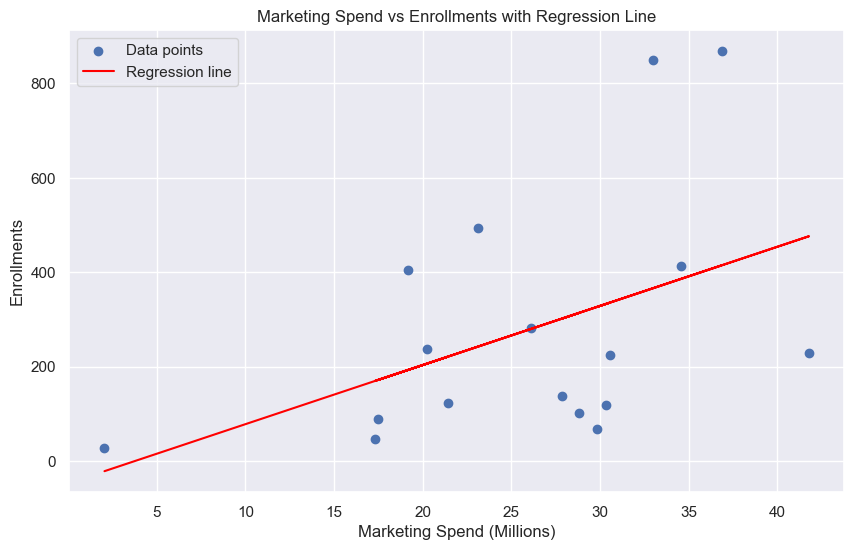

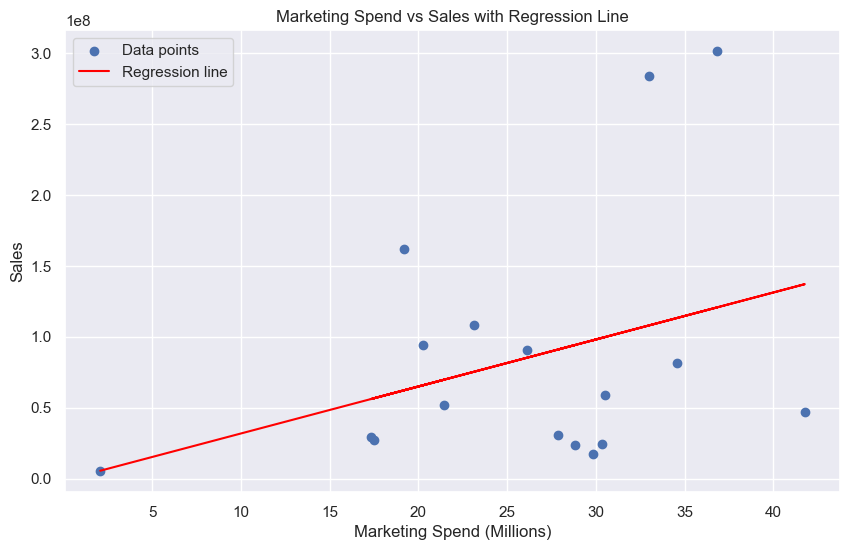

In [90]:


# Scatter plot and regression line for Marketing Spend vs Enrollments
plt.figure(figsize=(10, 6))
plt.scatter(df['Marketing Spend (Millions)'], df['Enrollments'], label="Data points")
plt.plot(df['Marketing Spend (Millions)'], model_enroll.predict(sm.add_constant(df['Marketing Spend (#)'])), 
         color='red', label="Regression line")
plt.title('Marketing Spend vs Enrollments with Regression Line')
plt.xlabel('Marketing Spend (Millions)')
plt.ylabel('Enrollments')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot and regression line for Marketing Spend vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Marketing Spend (Millions)'], df['Sales'], label="Data points")
plt.plot(df['Marketing Spend (Millions)'], model_sales.predict(sm.add_constant(df['Marketing Spend (#)'])), 
         color='red', label="Regression line")
plt.title('Marketing Spend vs Sales with Regression Line')
plt.xlabel('Marketing Spend (Millions)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
